#Second-Hand Car Price Prediction: Lineer Regression Model
Demonstrates the process of predicting second-hand car prices using a linear regression model.  
It covers data preprocessing, model training, prediction, error analysis, and visualization.

**Objectives:**
- Predict car prices using a cleaned dataset
- Evaluate model performance with various metrics
- Analyze error distribution and model performance across different price ranges

In [1412]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [1413]:
# Load the cleaned dataset
df = pd.read_csv("cleaned_data.csv")

In [1414]:
# Display DataFrame information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1396 entries, 0 to 1395
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   model        1396 non-null   object
 1   model_detay  1396 non-null   object
 2   model_yili   1396 non-null   int64 
 3   fiyat        1396 non-null   int64 
 4   sehir        1396 non-null   object
 5   ilce         1396 non-null   object
 6   ilan_turu    1396 non-null   object
 7   tip          1396 non-null   object
 8   marka        1396 non-null   object
 9   motor_hacmi  1396 non-null   object
 10  motor_tipi   1396 non-null   object
 11  donanim      1396 non-null   object
dtypes: int64(2), object(10)
memory usage: 131.0+ KB
None


In [1415]:
# convert selected columns to categorical types for better memory usage and performance
df["model"]        = df["model"].astype("category")
df["model_detay"]  = df["model_detay"].astype("category")
df["sehir"]        = df["sehir"].astype("category")
df["ilce"]         = df["ilce"].astype("category")
df["ilan_turu"]    = df["ilan_turu"].astype("category")
df["tip"]          = df["tip"].astype("category")
df["marka"]        = df["marka"].astype("category")
df["motor_hacmi"]  = df["motor_hacmi"].astype("category")
df["motor_tipi"]   = df["motor_tipi"].astype("category")
df["donanim"]      = df["donanim"].astype("category")

In [1416]:
# display DataFrame information again after type conversion
print((df.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1396 entries, 0 to 1395
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   model        1396 non-null   category
 1   model_detay  1396 non-null   category
 2   model_yili   1396 non-null   int64   
 3   fiyat        1396 non-null   int64   
 4   sehir        1396 non-null   category
 5   ilce         1396 non-null   category
 6   ilan_turu    1396 non-null   category
 7   tip          1396 non-null   category
 8   marka        1396 non-null   category
 9   motor_hacmi  1396 non-null   category
 10  motor_tipi   1396 non-null   category
 11  donanim      1396 non-null   category
dtypes: category(10), int64(2)
memory usage: 131.8 KB
None


In [1417]:
# Define categorical and numerical features
# This is important for the processing pipeline
# Categorical features will be one-hot encoded, and numeriical features will be scaled
# Note: Ensure that the features listed here match those in your dataset
categorical_features = [
    'model',
    'model_detay',
    'sehir',
    'ilce',
    'ilan_turu',
    'tip',
    'marka',
    'motor_hacmi',
    'motor_tipi',
    'donanim'
]
numerical_features = [
    'model_yili',
]

In [1418]:
# Create a pipeline for processing the data.
# The pipeline will scale numerical features and one-hot encode categorical features
full_pipeline = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

In [1419]:
# Seperate featres and target variable
# 'fiyat' is the target variable we waant to predict
X = df.drop('fiyat', axis=1) 
y = df['fiyat']    

In [1420]:
# Train the model
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1421]:
# Create a pipeline with preprocessing and linear regression model.
model = Pipeline([
    ('preparation', full_pipeline),
    ('linear_regression', LinearRegression())
])

In [1422]:
# Fit the model to the training data
model.fit(X_train, y_train)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['model_yili']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['model', 'model_detay',
                                                   'sehir', 'ilce', 'ilan_turu',
                                                   'tip', 'marka',
                                                   'motor_hacmi', 'motor_tipi',
                                                   'donanim'])])),
                ('linear_regression', LinearRegression())])

In [1423]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error (y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.2f}")


MSE: 14106689691.00
RMSE: 118771.59
R^2: 0.91


In [1424]:
# Get the feature importance (coefficients) from the linear regresson model
feature_importances = model.named_steps['linear_regression'].coef_
print(len(feature_importances))        # Özellik sayısını yazdırır
print(feature_importances)             # Katsayıları yazdırır

2028
[271171.92714688 -25606.95972985 120045.83215488 ... -52256.94999905
  78832.95267803  -6000.3396285 ]


In [1425]:
# Print the cofficients for each categorical feature
for i in range(len(categorical_features)):
    for j in range(len(model.named_steps['preparation'].transformers_[1][1].categories_[i])):
        print(
            model.named_steps['preparation'].transformers_[1][1].categories_[i][j],
            feature_importances[j]
        )

Alfa Romeo 147 1.6 TS Distinctive 271171.9271468755
Alfa Romeo Tonale 1.5 VGT TI -25606.95972984585
Audi A3 120045.83215488463
Audi A3 Sedan 1.4 TFSI Attraction -68870.47642826638
Audi A3 Sedan 1.6 TDI Ambiente 22593.881557219018
Audi A3 Sportback 1.0 TFSI Design Line 21190.216430421464
Audi A3 Sportback 1.6 TDI Attraction 53138.56390086435
Audi A4 Avant 2.5 TDI -115555.7627509093
Audi A4 Sedan 1.8 TFSI -18698.284799226014
Audi A4 Sedan 2.0 TDI -41771.674350434085
Audi A5 Sportback 2.0 TDI -82118.46740882334
Audi A6 Sedan 2.0 63165.07273069804
Audi A6 Sedan 2.0 TDI -94069.63468480736
Audi Q2 1.4 TFSI Design 182885.5827209359
Audi Q5 2.0 TDI Quattro 127197.44527144807
Audi Q7 3.0 TDI Quattro 48989.331646824096
BMW 1 Serisi 116d M Sport 97121.96634860465
BMW 1 Serisi 116i Premium 33068.63060263276
BMW 1 Serisi 116i Sport Line -81849.68332665166
BMW 1 Serisi 116i Standart -37155.52003732334
BMW 1 Serisi 118i Joy -42746.684332998506
BMW 2 Serisi 216d Gran Coupe First Edition Sport Line -20

In [1426]:
# Creare a sample new car DataFrame to predict its
new_car = pd.DataFrame({
    'model': ['Mercedes-Benz A 180'],
    'model_detay': ['2020 Model 50.000 km'],
    'model_yili': [2020],
    'sehir': ['İzmir'],
    'ilce': ['Bornova'],
    'ilan_turu': ['emlak'],
    'tip': ['Otomobil'],
    'marka': ['Mercedes-Benz'],
    'motor_hacmi': ['1.6'],
    'motor_tipi': ['Benzin'],
    'donanim': ['AMG']
})


In [1427]:
# Predşct the price of the new car
predicted_price = model.predict(new_car)
print(f"Estimated Price: {predicted_price[0]:.0f} TL")

Estimated Price: 1178811 TL


In [1428]:
# Find the similar cars in dataset
benzer_araclar = df[
    (df["marka"].str.lower() == "mercedes") &
    (df["model"].str.contains("A 180", case=False, na=False))
]
print(benzer_araclar[["model_yili", "model", "fiyat"]].sort_values(by="fiyat", ascending=False))

      model_yili                                           model    fiyat
114         2020                   Mercedes - Benz A 180 d Style  1950000
518         2020                   Mercedes - Benz A 180 d Style  1950000
1258        2020                   Mercedes - Benz A 180 d Style  1685000
801         2015    Mercedes - Benz A 180 CDI BlueEFFICIENCY AMG  1299000
836         2015    Mercedes - Benz A 180 CDI BlueEFFICIENCY AMG  1299000
1012        2015    Mercedes - Benz A 180 CDI BlueEFFICIENCY AMG  1299000
1141        2016                   Mercedes - Benz A 180 d Style  1265000
276         2014      Mercedes - Benz A 180 BlueEFFICIENCY Style  1240000
680         2014      Mercedes - Benz A 180 BlueEFFICIENCY Style  1240000
1066        2013  Mercedes - Benz A 180 CDI BlueEFFICIENCY Style   879000


In [1429]:
# Calculate the avarage price of similar cars
print("The avarage price of similar cars:", int(benzer_araclar["fiyat"].mean()), "TL")

The avarage price of similar cars: 1410600 TL


In [1430]:
#Compare the predicted price with the avarage price of similar cars
print("Predicted Price:", int(predicted_price[0]), "TL")
print("Real average price:", int(benzer_araclar["fiyat"].mean()), "TL")
print("Difference:", int(predicted_price[0] - benzer_araclar["fiyat"].mean()), "TL")

Predicted Price: 1178811 TL
Real average price: 1410600 TL
Difference: -231788 TL


In [1431]:
def tolerance_r2(y_true, y_pred, tolerance):
    """ Belirli bir tolerans değeri için R² skorunu hesaplar.
    Parameters:
    y_true : np.ndarray
        Gerçek fiyat değerleri
    y_pred : np.ndarray
        Tahmin edilen fiyat değerleri
    tolerance : float
        Tolerans değeri (TL cinsinden)
    Returns:
    float
        Toleranslı R² skoru (0-1 arasında)
    
    Examples:
    >>> tolerance_r2(y_test, y_pred, 10000)
    0.88
    """
    residuals = y_pred - y_true
    residuals[np.abs(residuals) <= tolerance] = 0
    ssr = np.sum(residuals ** 2)
    sst = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ssr / sst)

In [1432]:
def tolerance_percentage_r2(y_true, y_pred, tolerance):
    """Yüzdelik tolerans değeri için R² skorunu hesaplar.

    Parameters:
    y_true : np.ndarray
        Gerçek fiyat değerleri
    y_pred : np.ndarray
        Tahmin edilen fiyat değerleri
    tolerance : float
        Tolerans değeri (0-1 arasında yüzdelik)

    Returns:
    float
        Yüzdelik toleranslı R² skoru (0-1 arasında)
    
    Examples:
    >>> tolerance_percentage_r2(y_test, y_pred, 0.50)
    0.95
    """
    residuals = y_pred - y_true
    residuals[(np.abs(residuals) / y_true) <= tolerance] = 0
    ssr = np.sum(residuals ** 2)
    sst = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ssr / sst)

In [1433]:
print("R² Skoru:", r2_score(y_test, y_pred))
print("Tolerance R² (±10.000 TL):", tolerance_r2(y_test, y_pred, 10000))
print("Tolerance % R² (±%50 fark):", tolerance_percentage_r2(y_test, y_pred, 0.50))

R² Skoru: 0.9131133953196255
Tolerance R² (±10.000 TL): 0.9131162029662119
Tolerance % R² (±%50 fark): 0.9746813507824504


In [1434]:
results_df = pd.DataFrame({
    "Real Price": y_test.values,
    "Predicted Price": y_pred,
    "Difference": y_pred - y_test.values
})
display(results_df.head(10))  # İlk 10 satırı göster

,Real Price,Predicted Price,Difference
0,1455900,1.455901e+06,1.304512
1,1599000,1.348896e+06,-250103.517105
2,1650000,1.080575e+06,-569424.590862
3,699000,6.989729e+05,-27.053504
4,715000,8.225017e+05,107501.701655
5,385000,3.849986e+05,-1.386599
6,698000,7.477432e+05,49743.153605
7,965000,9.650169e+05,16.933593
8,670000,6.699940e+05,-6.029814
9,605000,6.049905e+05,-9.509652


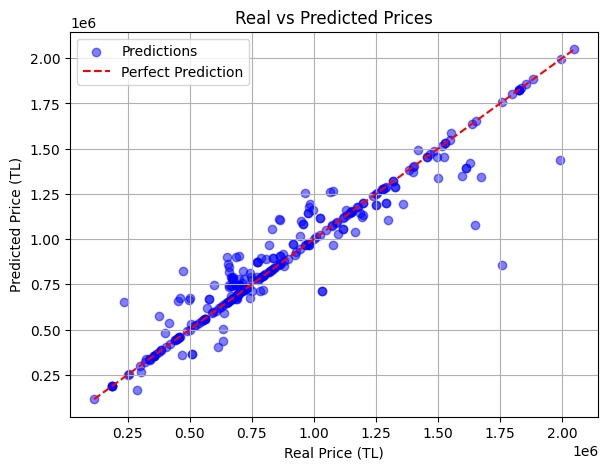

In [1435]:
""" Model Performance Visualization
This section vizulizes the model's performance using various plots"""

# True Predicted Price Comparison
plt.figure(figsize=(15, 5))

# Scattes plot for True vs Predicted Prices
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         'r--', 
         label='Perfect Prediction')
plt.xlabel("Real Price (TL)")
plt.ylabel("Predicted Price (TL)")
plt.title("Real vs Predicted Prices")
plt.legend()
plt.grid(True)

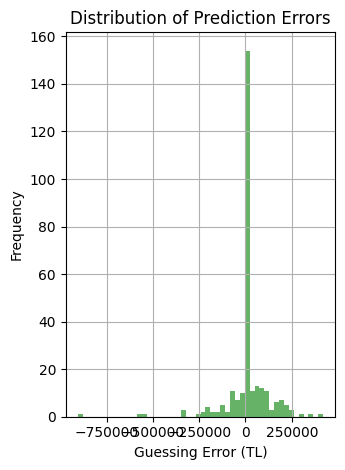

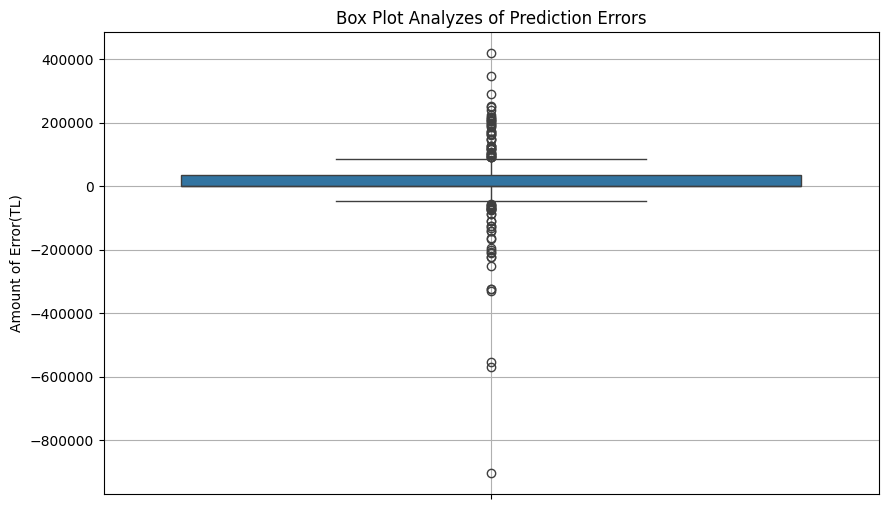

In [1436]:
# Distribution of Prediction Errors
plt.subplot(1, 2, 2)
plt.hist(y_pred - y_test, bins=50, color='green', alpha=0.6)
plt.xlabel("Guessing Error (TL)")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors")
plt.grid(True)

plt.tight_layout()
plt.show()

# Box Plot of Prediction Errors
plt.figure(figsize=(10, 6))
sns.boxplot(y=y_pred - y_test)
plt.title("Box Plot Analyzes of Prediction Errors")
plt.ylabel("Amount of Error(TL)")
plt.grid(True)
plt.show()

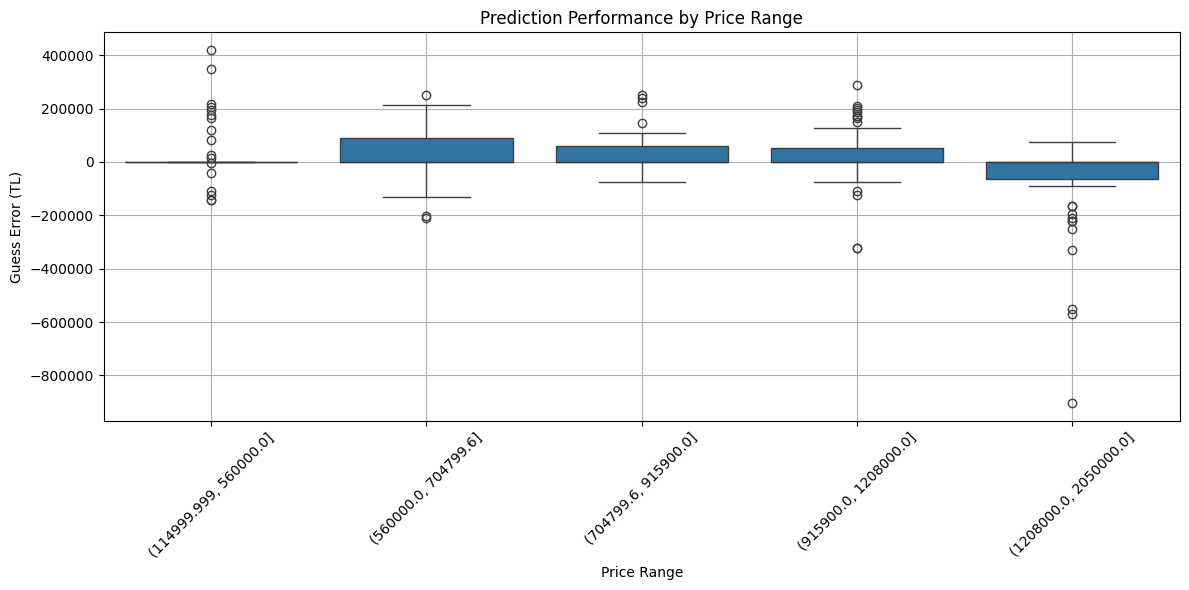

In [1437]:
# Performance by Price Range 
# This boxplot shows how the prediction errors (residuals) are distributed across different true price ranges.
# It helps to identify whether the model's accuracy varies for cheaper vs. more expensive cars.
# For example, if the boxes are wider or shifted in certain price ranges, it may indicate higher error or bias in those segments.
plt.figure(figsize=(12, 6))
results_df['Price Range'] = pd.qcut(results_df['Real Price'], q=5)
sns.boxplot(x='Price Range', y='Difference', data=results_df)
plt.xticks(rotation=45)
plt.xlabel("Price Range")
plt.ylabel("Guess Error (TL)")
plt.title("Prediction Performance by Price Range")
plt.grid(True)
plt.tight_layout()
plt.show()

In [1438]:
# Analyze prediction errors by price range based only on bias (median error)
MEDIAN_THRESHOLD = 5000  # TL, for unbiasedness

for interval, group in results_df.groupby('Price Range'):
    median_error = group['Difference'].median()
    print(f"Price Range: {interval}")
    print(f"  Median Error: {median_error:.2f} TL")
    if abs(median_error) < MEDIAN_THRESHOLD:
        print("The model is unbiased in this range (median error close to zero).")
    else:
        print("The model may be biased in this range (median error far from zero).")
    print()

Price Range: (114999.999, 560000.0]
  Median Error: 4.13 TL
The model is unbiased in this range (median error close to zero).

Price Range: (560000.0, 704799.6]
  Median Error: 15.74 TL
The model is unbiased in this range (median error close to zero).

Price Range: (704799.6, 915900.0]
  Median Error: 15.91 TL
The model is unbiased in this range (median error close to zero).

Price Range: (915900.0, 1208000.0]
  Median Error: 8.09 TL
The model is unbiased in this range (median error close to zero).

Price Range: (1208000.0, 2050000.0]
  Median Error: -7.09 TL
The model is unbiased in this range (median error close to zero).



In [1439]:
# summary of errors table
hata_ozeti = pd.DataFrame({
    'Metric': ['Mean Error', 'Median Error', 'Std. Deviation', 'Min Error', 'Max Error'],
    'Value': [
        results_df['Difference'].mean(),
        results_df['Difference'].median(),
        results_df['Difference'].std(),
        results_df['Difference'].min(),
        results_df['Difference'].max()
    ]
})
display(hata_ozeti)

,Metric,Value
0,Mean Error,7880.579913
1,Median Error,4.069261
2,Std. Deviation,118722.050057
3,Min Error,-903950.657540
4,Max Error,419178.745420
